In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from collections import defaultdict
from timeit import timeit
from time import time
from timeit import default_timer as timer


data = pd.read_csv('songs.csv')
data.head()

,Angelica,Blues Traveler,3.5
0,Angelica,Norah Jones,4.5
1,Angelica,Phoenix,5.0
2,Angelica,The Strokes,2.5
3,Angelica,Weird Al,NaN
4,Bill,Blues Traveler,2.0


In [5]:
headers = data.columns[1:data.shape[1]]

In [6]:
def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))

d = defaultdict(dict)#nested_dict(2, float)
f = open("ratings.csv")
#f = open("song.csv")
i = 0
val = []
for line in f:
    line = line.strip('\n')
    if i != 0:
        val = line.split(",")
        #print(val)
        #(id_u,movie,rating) = line.split(",")
        d[val[0]][val[1]] = float(val[2])
    i=1


In [82]:
def load_data(name):
    d = defaultdict(dict)
    f = open(name)
    i = 0
    val = []
    for line in f:
        line = line.strip('\n')
        if i != 0:
            val = line.split(",")
            d[val[0]][val[1]] = float(val[2])
        i=1
    return d

def pearson_numpy(d,key1,key2):
    a = np.array(list(d[key1].keys()))
    b = np.array(list(d[key2].keys()))
    c = np.intersect1d(a,b)
    a = []
    b = []
    for i in c:
        a.append(float(d[key1][i]))
        b.append(float(d[key2][i]))
    a=np.array(a)
    b=np.array(b)
    return len(c),np.corrcoef(a,b)

def pearson_num(data,key1,key2):
    a = np.array(list(data[key1].keys()))
    b = np.array(list(data[key2].keys()))
    vect = np.intersect1d(a,b)
    dimension = len(vect)
    
    a = []
    b = []
    for i in vect:
        a.append(data[key1][i])
        b.append(data[key2][i])
    
    sum_xy = sum(np.array(a)*np.array(b))
    sum_x = sum(np.array(a))
    sum_y = sum(np.array(b))
    sum_x2 = sum(np.array(a)**2)
    sum_y2 = sum(np.array(b)**2)
    
    denominator = math.sqrt(sum_x2-sum_x**2/dimension)*math.sqrt(sum_y2-sum_y**2/dimension)
    
    #print("\t\t",sum_xy," ",sum_x," ",sum_y," ",sum_x2," ",sum_y2)
    if denominator == 0:
        return dimension,0
    else:
        return dimension,(sum_xy-(sum_x*sum_y)/dimension) / denominator
    
def pearson_pyt(d,key1,key2):
    dimension = 0
    cal1 = 0
    cal2 = [0,0]
    cal3 = [0,0]
    cal4 = [0,0]
    cal5 = [0,0]

    for i in d[key1]:
        if i in d[key2]:
            dimension+=1
            cal1 = cal1+d[key1][i]*d[key2][i]
            cal2[0] = cal2[0]+d[key1][i]
            cal2[1] = cal2[1]+d[key2][i]
            
            cal3[0] = cal3[0]+(d[key1][i]**2)
            cal3[1] = cal3[1]+(d[key2][i]**2)

    cal5_n = math.sqrt(cal3[0]-cal2[0]**2/dimension) * math.sqrt(cal3[1]-cal2[1]**2/dimension)
    cal2_n = (cal1 - (cal2[0] * cal2[1]) / dimension)
    '''cal4[0] = (cal2[0]**2)/dimension
    cal4[1] = (cal2[1]**2)/dimension

    cal5[0] = math.sqrt(cal3[0]-cal4[0])
    cal5[1] = math.sqrt(cal3[1]-cal4[1])

    cal2_n = (cal2[0]*cal2[1])/len(d[key1])
    cal2_n = cal1 - cal2_n
    
    cal5_n = (cal5[0]*cal5[1])
    
    print(cal1)
    print(cal2)
    print(cal3)
    print(cal4)
    print(cal5)
    print(cal2_n)
    print((cal5[0]*cal5[1]))
    '''
    if cal5_n == 0:
        return dimension,0
    r= cal2_n/cal5_n
    return dimension,r


data =load_data('song.csv')
print(pearson_pyt(data,'Clara','Robert'))
print(pearson_num(data,'Clara','Robert'))

(5, 0.9999999999999998)
(5, 0.9999999999999998)


In [90]:
array = []


d = load_data('ratings.csv')
start = timer()
val1,val2 = pearson_pyt(d,'4','20')
array.append((val1, timer()-start))


start1 = timer()
val1,val2 = pearson_num(d,'4','20')
array.append((val1, timer()-start1))


start2 = timeit()
val1,val2 = pearson_numpy(d,"4","20")
array.append((val1, timeit()-start2))

print(array)

[(24, 0.00018619999900693074), (24, 0.0005256000004010275), (24, 0.0005738000036217272)]


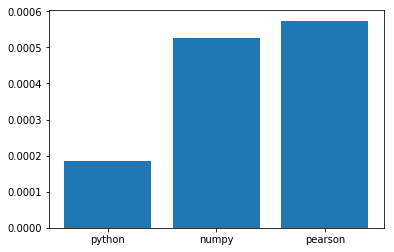

In [99]:
array1 = [i[1] for i in array]
array1.append(0.048970)

y = ["python",'numpy',"pearson","c++"]
fig,ax = plt.subplots()
ax.bar(y,array1)
plt.show()

In [211]:
def pearson_py(d,key1,key2):
    if len(d[key1])>len(d[key2]):
        dimension = len(d[key1])
    else:
        dimension = len(d[key1])

    cal1 = 0
    cal2 = [0,0]
    cal3 = [0,0]
    cal4 = [0,0]
    cal5 = [0,0]

    for i in d[key1]:
        cal2[0] = cal2[0]+d[key1][i]
        cal3[0] = cal3[0]+(d[key1][i]**2)
        if i in d[key2]:
            cal1 = cal1+d[key1][i]*d[key2][i]
        #elif not i in d[key2]:
         #   cal1 = cal1+d[key1][i]

    for i in d[key2]:
        cal2[1] = cal2[1]+d[key2][i]
        cal3[1] = cal3[1]+(d[key2][i]**2)


    cal4[0] = (cal2[0]**2)/dimension
    cal4[1] = (cal2[1]**2)/dimension

    cal5[0] = math.sqrt(cal3[0]-cal4[0])
    cal5[1] = math.sqrt(cal3[1]-cal4[1])

    cal2_n = (cal2[0]*cal2[1])/len(d[key1])
    cal2_n = cal1 - cal2_n
    r= cal2_n/(cal5[0]*cal5[1])
    '''print(cal1)
    print(cal2)
    print(cal3)
    print(cal4)
    print(cal5)
    print(cal2_n)
    print((cal5[0]*cal5[1]))'''
    return r




cal1 = 0
cal2 = [0 for _ in range(data.shape[0])]
cal3 = [0 for _ in range(data.shape[0])]
cal4 = [0 for _ in range(data.shape[0])]
cal5 = [0 for _ in range(data.shape[0])]

for i in headers:
    multi = data[i][0]
    for j in range(0,len(data[i])):
        if j>0:
            multi = multi * int(data[i][j])
        cal2[j]=cal2[j]+data[i][j]
        cal3[j]=cal3[j]+data[i][j]**2
    cal1=cal1+multi

f_mul = cal2[0]
f_div = 0
for i in range(0,len(data[i])):
    cal4[i] = (cal2[i]**2)/(data.shape[1]-1)
    cal5[i] = math.sqrt(cal3[i]-cal4[i])
    if i==0:
        f_div = cal5[0]
    else:
        f_mul = f_mul*cal2[i]
        f_div = f_div*cal5[i]

f_mul = f_mul/(data.shape[1]-1)
r = (cal1-f_mul)/(f_div)

print(cal1)
print(cal2)
print(cal3)
print(cal4)
print(cal5)

print(r)

70.0
[22.5, 15.0]
[101.875, 55.0]
[101.25, 45.0]
[0.7905694150420949, 3.1622776601683795]
0.9999999999999998
